In [1]:
# Importing the Pandas library for data manipulation and analysis
import pandas as pd

# Importing the NumPy library for numerical operations and handling arrays
import numpy as np

# Importing the load_wine function from sklearn.datasets to load the wine dataset
from sklearn.datasets import load_wine



In [2]:

# Defining column names based on the details provided in the wine.names file
# These columns will be used to label the data in the CSV file
columns = [
    "wine_type", 
    "alcohol", 
    "malic_acid", 
    "ash", 
    "alcalinity_of_ash", 
    "magnesium", 
    "total_phenols", 
    "flavanoids", 
    "nonflavanoid_phenols", 
    "proanthocyanins", 
    "color_intensity", 
    "hue", 
    "OD280/OD315_of_diluted_wines", 
    "proline"
]

# Reading the wine.data file into a Pandas DataFrame using the predefined column names
wine_df = pd.read_csv("/Users/arshiataghavinejad/Downloads/wine/wine.data", header=None, names=columns)

# Saving the processed data with column names into a new CSV file
# The 'index=False' argument ensures that the DataFrame's index is not saved in the CSV file
wine_df.to_csv("/Users/arshiataghavinejad/Downloads/wine/processed_wine_data.csv", index=False)

# Printing the summary information of the DataFrame to check its structure and data types
print(wine_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine_type                     178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  proli

In [3]:
# This line of code checks for the presence of missing values in each column of the wine_df DataFrame.
# For each column, it sums up the number of missing values and displays them.
print(wine_df.isnull().sum())



wine_type                       0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted_wines    0
proline                         0
dtype: int64


In [4]:
# Check and print the number of duplicate rows in the DataFrame
print(f"Number of duplicate rows: {wine_df.duplicated().sum()}")

# Remove duplicate rows from the DataFrame
wine_df = wine_df.drop_duplicates()



Number of duplicate rows: 0


In [5]:
# Import the StandardScaler class from sklearn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
# This will be used to standardize (mean=0 and variance=1) the dataset's features
scaler = StandardScaler()

# Standardize all columns of the dataframe except the 'wine_type' column
# fit_transform method standardizes the data and the result is assigned back to the respective columns of the dataframe
wine_df.iloc[:, 1:] = scaler.fit_transform(wine_df.iloc[:, 1:])



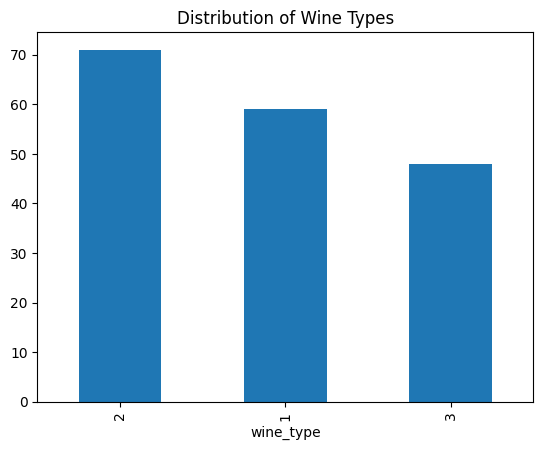

In [6]:
# Import the matplotlib library for data visualization
import matplotlib.pyplot as plt

# Plot the distribution of different wine types present in the 'wine_type' column of the dataframe
# The 'value_counts()' function returns the frequency of each unique value in the column
# The 'plot()' function with 'kind' set to 'bar' will create a bar chart
wine_df['wine_type'].value_counts().plot(kind='bar', title='Distribution of Wine Types')

# Display the plot
plt.show()


In [7]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = wine_df.drop('wine_type', axis=1)
y = wine_df['wine_type']

# Split the data into training and test sets using train_test_split
# The 'test_size' parameter specifies the proportion of the dataset to include in the test split
# The 'random_state' parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of the training and test sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")



Training set size: 142
Test set size: 36


In [8]:
import numpy as np

# Calculate the mean of each feature
mean_values = np.mean(X_train, axis=0)

# Center the data by subtracting the mean
centered_data = X_train - mean_values

# Calculate the covariance matrix of the centered data
covariance_matrix = np.cov(centered_data, rowvar=False)

# Perform eigendecomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the top k eigenvectors to form the transformation matrix
k = 2  # You can adjust this value based on your needs
transformation_matrix = eigenvectors[:, :k]

# Transform the centered data using the transformation matrix
X_train_pca_np = np.dot(centered_data, transformation_matrix)




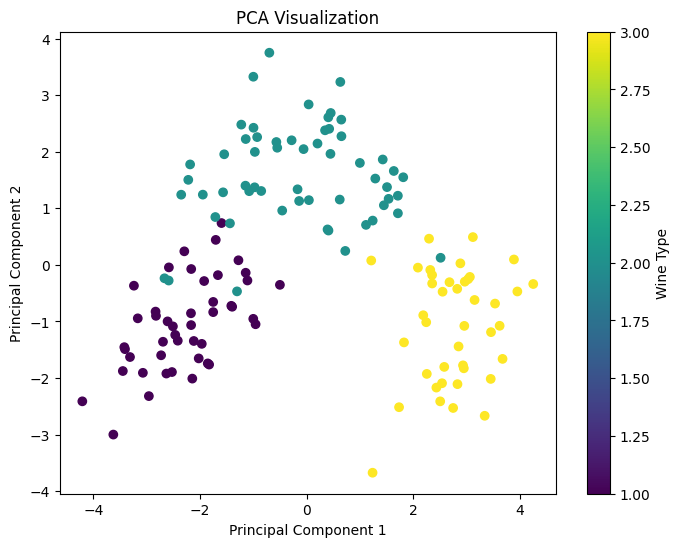

In [9]:


# Cell defining X_train_pca and y_train (Execute this cell first)
X_train_pca = np.dot(centered_data, transformation_matrix)

# Cell for creating the scatter plot (Execute this cell after defining X_train_pca)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Wine Type')
plt.show()

# Subsequent cells for the Random Forest classifier and evaluation


In [10]:

X_test_centered = X_test - mean_values
X_test_pca = np.dot(X_test_centered, transformation_matrix)

# Cell for Random Forest classifier and evaluation (Execute this cell after defining X_test_pca)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train_pca, y_train)

# Predict the wine types on the test data
y_pred = clf.predict(X_test_pca)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



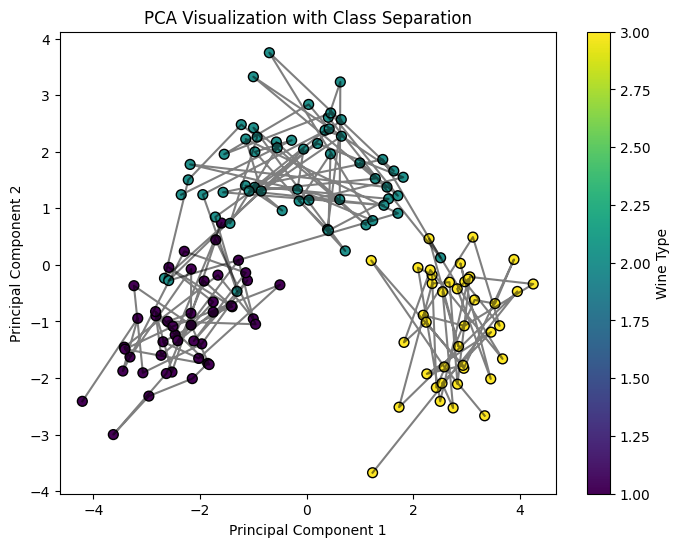

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set the figure size for the plot

# Scatter plot with PCA components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k', s=50)

# Draw lines to separate classes
for wine_type in np.unique(y_train):
    X_wine_type = X_train_pca[y_train == wine_type]
    plt.plot(X_wine_type[:, 0], X_wine_type[:, 1], 'k-', alpha=0.5)

plt.xlabel('Principal Component 1')  # Label for the x-axis
plt.ylabel('Principal Component 2')  # Label for the y-axis
plt.title('PCA Visualization with Class Separation')  # Title for the plot
plt.colorbar(label='Wine Type')  # Add a colorbar with label
plt.show()  # Display the plot
